In [1]:
# Load package
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# Populasi Bandung Raya (Cekungan Bandung)

- Kota Bandung
- Kota Cimahi
- Kabupaten Bandung
- Kabupaten Bandung Barat
- Kabupaten Sumedang

## Kota Bandung

### Daftar Kecamatan di Kota Bandung

In [2]:
# This script is used to process an excel file containing data about the districts in Bandung city.
# Next, we read the excel file and assign it to the variable "kec_bandung"
kec_bandung = pd.read_excel(io="Dataset/kecamatan_kota_bandung.xlsx", sheet_name="list_kecamatan")

# We rename the columns to more meaningful names
kec_bandung.rename(columns={
    "Kode _x000D_\nKemendagri" : "kode_kemendagri",
    "Kecamatan" : "kecamatan",
    "Jumlah _x000D_\nKelurahan" : "jumlah_kelurahan",
    "Daftar _x000D_\nKelurahan" : "daftar_kelurahan"
}, inplace=True)


### Luas Kecamatan di Kota Bandung

In [3]:
# This script is used to process an excel file containing data about the area of districts in Bandung city.
# Next, we read the excel file and assign it to the variable "luas_bandung"
luas_bandung = pd.read_excel("Dataset/kecamatan_kota_bandung.xlsx", sheet_name="luas_kecamatan")

# We rename the columns to more meaningful names
luas_bandung.rename(columns={
    "Kecamatan" : "kecamatan",
    "Ibukota Kecamatan" : "ibukota_kecamatan",
    "Luas Area (km2/persegi)" : "luas_area"
}, inplace=True)


### Populasi di Kecamatan Kota Bandung

In [4]:
# This script is used to process an excel file containing data about the population of districts in Bandung city.
# Next, we read the excel file and assign it to the variable "populasi_bandung"
populasi_bandung = pd.read_excel("Dataset/kecamatan_kota_bandung.xlsx", sheet_name="populasi_kecamatan")

# We drop unnecessary column
populasi_bandung.drop(['Populasi (dalam seribu)'], axis=1 ,inplace=True)

# We rename the columns to more meaningful names
populasi_bandung.rename(columns={
    "Kecamatan" : "kecamatan",
    "Populasi" : "populasi",
    "Laju Pertumbuhan Pertumbuhan Penduduk per Tahun (%)" : "laju_pertumbuhan"
}, inplace=True)


### Kepadatan Penduduk di Kecamatan Kota Bandung

In [5]:
# This script is used to process an excel file containing data about the population density of districts in Bandung city.
# Next, we read the excel file and assign it to the variable "density_bandung"
density_bandung = pd.read_excel("Dataset/kecamatan_kota_bandung.xlsx", sheet_name="density_kecamatan")

# We rename the columns to more meaningful names
density_bandung.rename(columns={
    "Kecamatan" : "kecamatan",
    "Persentase Penduduk" : "persentase_penduduk",
    "Kepadatan Penduduk per km**2" : "kepadatan_penduduk"
}, inplace=True)


### Proporsi Penduduk di Kota Bandung Berdasarkan Jenis Kelamin dan Kelompok Umur

In [6]:
# This script is used to process an excel file containing data about the age and sex proportion of districts in Bandung city.
# Next, we read the excel file and assign it to the variable "proporsi_age_sex_bandung"
proporsi_age_sex_bandung = pd.read_excel("Dataset/kecamatan_kota_bandung.xlsx", sheet_name="proporsi_kelompok_umur")

# Finally, we print the processed data
display(proporsi_age_sex_bandung)


,Kelompok Umur,Laki-laki,Perempuan,Total
0,0-4,92798,88580,181378
1,5-9,90935,87077,178012
2,10-14,98826,93211,192037
3,15-19,102232,96706,198938
4,20-24,100290,97357,197647
5,25-29,101090,98185,199275
6,30-34,97745,93728,191473
7,35-39,98581,92833,191414
8,40-44,96582,93003,189585
9,45-49,85944,84974,170918


In [7]:
# This script calculates the proportion of the population in the age range of 15-34 years old (considered as the productive age range) in the city of Bandung.
usia_prod_bandung = np.sum(proporsi_age_sex_bandung.iloc[3:7]['Total']) / np.sum(proporsi_age_sex_bandung['Total'])

print(f'Terdapat rasio sebesar {usia_prod_bandung:.2%} jiwa pada usia produktif (15-34 Tahun) di Kota Bandung')

Terdapat rasio sebesar 33.34% jiwa pada usia produktif (15-34 Tahun) di Kota Bandung


### DataFrame Gabungan Kota Bandung

In [8]:
# This script is used to merge multiple dataframes containing data about districts in Bandung city and create a final dataframe.

# First, we merge the dataframe "kec_bandung" and "luas_bandung" using the 'left' merge method and assign it to the variable "merged_bandung_1"
merged_bandung_1 = pd.merge(kec_bandung, luas_bandung, how='left')

# Next, we merge the dataframe "populasi_bandung" and "density_bandung" using the 'left' merge method and assign it to the variable "merged_bandung_2"
merged_bandung_2 = pd.merge(populasi_bandung, density_bandung, how='left')

# Then we merge the previous 2 dataframes using the 'left' merge method and assign it to the variable "df_kota_bandung"
df_kota_bandung = pd.merge(merged_bandung_1, merged_bandung_2, how='left')

# Finally, we drop the unnecessary column
df_kota_bandung.drop(["daftar_kelurahan"], axis=1, inplace=True)

df_kota_bandung.rename(columns={
    'jumlah_kelurahan' : 'jumlah_desa_kelurahan'
}, inplace=True)

#print the final dataframe
display(df_kota_bandung)


,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.73.05,Andir,6,Garuda,3.71,96500,0.13,3.93,22856.0
1,32.73.10,Astanaanyar,6,Panjunan,2.89,68500,0.19,2.79,25553.0
2,32.73.20,Antapani,4,Antapani Wetan,3.79,80000,1.12,3.26,18958.0
3,32.73.24,Arcamanik,4,Cisaranten Kulon,5.87,78400,2.00,3.20,10335.0
4,32.73.03,Babakan Ciparay,6,Babakan Ciparay,7.45,142400,0.02,5.81,20146.0
5,32.73.21,Bandung Kidul,4,Mengger,6.06,60200,0.44,2.46,11115.0
6,32.73.15,Bandung Kulon,8,Caringin,6.46,138800,0.01,5.66,19976.0
7,32.73.09,Bandung Wetan,3,Tamansari,3.39,26700,0.01,1.09,7764.0
8,32.73.12,Batununggal,8,Gumuruh,5.03,115400,0.01,4.71,23945.0
9,32.73.04,Bojongloa Kaler,5,Suka Asih,3.03,119400,0.09,4.87,38267.0


## Kota Cimahi

### Daftar Kecamatan di Kota Cimahi

In [9]:
# This script is used to process an excel file containing data about the districts in Cimahi city.
# Next, we read the excel file and assign it to the variable "kec_cimahi"
kec_cimahi = pd.read_excel("Dataset/kecamatan_kota_cimahi.xlsx", sheet_name="kecamatan_kota_cimahi")

# We rename the columns to more meaningful names
kec_cimahi.rename(columns={
    "Kode _x000D_\nKemendagri" : "kode_kemendagri",
    "Kecamatan" : "kecamatan",
    "Jumlah _x000D_\nKelurahan" : "jumlah_kelurahan",
    "Daftar _x000D_\nKelurahan" : "daftar_kelurahan"
}, inplace=True)

### Luas Kecamatan di Kota Cimahi

In [10]:
# This script is used to process an excel file containing data about the area of districts in Cimahi city.
# Next, we read the excel file and assign it to the variable "luas_cimahi"
luas_cimahi = pd.read_excel("Dataset/kecamatan_kota_cimahi.xlsx", sheet_name="luas_kecamatan")

# We rename the columns to more meaningful names
luas_cimahi.rename(columns={
    "Kecamatan" : "kecamatan",
    "Ibukota Kecamatan" : "ibukota_kecamatan",
    "Luas Area" : "luas_area",
    "Persentase Total" : "persentase_wilayah"
}, inplace=True)

# We convert the persentase wilayah column into decimal
luas_cimahi['persentase_wilayah'] = luas_cimahi['persentase_wilayah'].apply(lambda x: x/100)


### Populasi di Kecamatan Kota Cimahi

In [11]:
# This script is used to process an excel file containing data about the population of districts in Cimahi city.
# Next, we read the excel file and assign it to the variable "populasi_cimahi"
populasi_cimahi = pd.read_excel("Dataset/kecamatan_kota_cimahi.xlsx", sheet_name="populasi_kecamatan")

# We rename the columns to more meaningful names
populasi_cimahi.rename(columns={
    "Kecamatan" : "kecamatan",
    "Populasi" : "populasi",
    "Laju Pertumbuhan" : "laju_pertumbuhan"
}, inplace=True)

### Kepadatan Penduduk di Kota Cimahi

In [12]:
# This script is used to process an excel file containing data about the population density of districts in Cimahi city.
# Next, we read the excel file and assign it to the variable "density_cimahi"
density_cimahi = pd.read_excel("Dataset/kecamatan_kota_cimahi.xlsx", sheet_name="density_kecamatan")

# We rename the columns to more meaningful names
density_cimahi.rename(columns={
    "Kecamatan" : "kecamatan",
    "Persentase Penduduk (%)" : "persentase_penduduk",
    "Kepadatan Penduduk" : "kepadatan_penduduk"
}, inplace=True)

# We convert the persentase penduduk column into decimal
density_cimahi['persentase_penduduk'] = density_cimahi['persentase_penduduk'].apply(lambda x: x/100)


### Proporsi Penduduk di Kota Cimahi berdasarkan jenis kelamin dan kelompok umur

In [13]:
# This script is used to process an excel file containing data about the age and sex proportion of districts in Cimahi city.
# Next, we read the excel file and assign it to the variable "proporsi_age_sex_cimahi"
proporsi_age_sex_cimahi = pd.read_excel("Dataset/kecamatan_kota_cimahi.xlsx", sheet_name="proporsi_kelompok_umur")

# Finally, we print the processed data
proporsi_age_sex_cimahi

,Kelompok Umur,Laki-laki,Perempuan,Total
0,0-4,21391,20550,41941
1,5-9,21403,20558,41961
2,10-14,23832,22468,46300
3,15-19,24779,23639,48418
4,20-24,24417,23991,48408
5,25-29,24625,23558,48183
6,30-34,22977,21435,44412
7,35-39,22544,21674,44218
8,40-44,22902,22705,45607
9,45-49,20771,20840,41611


In [14]:
# This script calculates the proportion of the population in the age range of 15-34 years old (considered as the productive age range) in the city of Cimahi.
usia_prod_cimahi = np.sum(proporsi_age_sex_cimahi.iloc[3:7]['Total']) / np.sum(proporsi_age_sex_cimahi['Total'])

# Print variable
print(f'Terdapat rasio sebesar {usia_prod_cimahi:.2%} jiwa pada usia produktif (15-34 Tahun) di Kota Cimahi')

Terdapat rasio sebesar 31.91% jiwa pada usia produktif (15-34 Tahun) di Kota Cimahi


### DataFrame Gabungan Kota Cimahi

In [15]:
# This script is used to merge multiple dataframes containing data about districts in Cimahi city and create a final dataframe.
# First, we merge the dataframe "kec_cimahi" and "luas_cimahi" using the 'left' merge method and assign it to the variable "merged_cimahi_1"
merged_cimahi_1 = pd.merge(kec_cimahi, luas_cimahi, how='left')

# Next, we merge the dataframe "populasi_cimahi" and "density_cimahi" using the 'left' merge method and assign it to the variable "merged_cimahi_2"
merged_cimahi_2 = pd.merge(populasi_cimahi, density_cimahi, how='left')

# Then we merge the previous 2 dataframes using the 'left' merge method and assign it to the variable "df_kota_cimahi"
df_kota_cimahi = pd.merge(merged_cimahi_1, merged_cimahi_2, how='left')

# we drop the unnecessary column
df_kota_cimahi.drop(['daftar_kelurahan', 'persentase_wilayah'], axis=1, inplace=True)

df_kota_cimahi.rename(columns={
    'jumlah_kelurahan' : 'jumlah_desa_kelurahan'
}, inplace=True)

# transform populasi to integer
df_kota_cimahi['populasi'] = df_kota_cimahi['populasi'].apply(lambda x: x * 1000)
df_kota_cimahi['populasi'] = df_kota_cimahi['populasi'].astype('int64')

#print the final dataframe
display(df_kota_cimahi)


,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.77.01,Cimahi Selatan,5,Utama,16.94,242200,0.65,0.4237,14295
1,32.77.02,Cimahi Tengah,6,Cimahi,10.11,161900,0.08,0.2831,16009
2,32.77.03,Cimahi Utara,4,Cibabat,13.32,167600,1.59,0.2932,12584


## Kabupaten Bandung

### Daftar Kecamatan / Desa di Kabupaten Bandung

In [16]:
# This script is used to process an excel file containing data about the districts and sub-districts of Bandung Regency.
# Next, we read the excel file and assign it to the variable "kec_kab_bandung"
kec_kab_bandung = pd.read_excel("Dataset/kecamatan_kabupaten_bandung.xlsx", sheet_name="kecamatan_kab_bandung")

# We rename the columns to more meaningful names
kec_kab_bandung.rename(columns={
    "Kode_x000D_\nKemendagri" : "kode_kemendagri",
    "Kecamatan" : "kecamatan",
    "Jumlah_x000D_\nKelurahan" : "jumlah_kelurahan",
    "Jumlah _x000D_\nDesa" : "jumlah_desa",
    "Daftar_x000D_\nDesa/Kelurahan" : "daftar_desa_kelurahan"
}, inplace=True)

# We drop the unnecessary columns
kec_kab_bandung.drop(['Kodepos', 'Status', 'daftar_desa_kelurahan'], axis=1, inplace=True)

# We fill in the missing values with 0
kec_kab_bandung.fillna(0, inplace=True)

# We drop the duplicate rows
kec_kab_bandung.drop_duplicates(keep='first', inplace=True)

# We create a new column for the total number of sub-districts by adding the number of villages and the number of sub-districts.
kec_kab_bandung['jumlah_desa_kelurahan'] = kec_kab_bandung['jumlah_desa'] + kec_kab_bandung['jumlah_kelurahan']

# We change the type of the new column to int64
kec_kab_bandung['jumlah_desa_kelurahan'] = kec_kab_bandung["jumlah_desa_kelurahan"].astype('int64')

# We drop the original columns for villages and sub-districts
kec_kab_bandung.drop(['jumlah_kelurahan', 'jumlah_desa'], axis=1, inplace=True)

# Finally, we print the processed data
display(kec_kab_bandung)


,kode_kemendagri,kecamatan,jumlah_desa_kelurahan
0,32.04.16,Arjasari,11
1,32.04.32,Baleendah,8
3,32.04.13,Banjaran,11
4,32.04.08,Bojongsoang,6
5,32.04.44,Cangkuang,7
6,32.04.25,Cicalengka,12
7,32.04.27,Cikancung,9
8,32.04.07,Cilengkrang,6
9,32.04.05,Cileunyi,6
10,32.04.17,Cimaung,10


### Luas Kecamatan di Kabupaten Bandung

In [17]:
# This script is used to process an excel file containing data about the area of districts in Bandung Regency.
# Next, we read the excel file and assign it to the variable "luas_kab_bandung"
luas_kab_bandung = pd.read_excel("Dataset/kecamatan_kabupaten_bandung.xlsx", sheet_name="luas_kecamatan")

# We rename the columns to more meaningful names
luas_kab_bandung.rename(columns={
    "Kecamatan" : "kecamatan",
    "Ibukota Kecamatan" : "ibukota_kecamatan",
    "Luas Area" : "luas_area"
}, inplace=True)

# We capitalize the name of each district
luas_kab_bandung['kecamatan'] = luas_kab_bandung['kecamatan'].apply(lambda x: x.capitalize())

### Populasi di Kecamatan Kabupaten Bandung

In [18]:
# This script is used to process an excel file containing data about the population of districts in Bandung Regency.
# Next, we read the excel file and assign it to the variable "populasi_kab_bandung"
populasi_kab_bandung = pd.read_excel("Dataset/kecamatan_kabupaten_bandung.xlsx", sheet_name="populasi_kecamatan")

# We drop the unnecessary columns
populasi_kab_bandung.drop(['Populasi (2020)', 'Laju Pertumbuhan (2010-2021)'], axis=1, inplace=True)

# We rename the columns to more meaningful names
populasi_kab_bandung.rename(columns={
    "Kecamatan" : "kecamatan",
    "Populasi (2021)" : "populasi",
    "Laju Pertumbuhan (2020-2021)" : "laju_pertumbuhan"
}, inplace=True)

# We capitalize the name of each district
populasi_kab_bandung['kecamatan'] = populasi_kab_bandung['kecamatan'].apply(lambda x: x.capitalize())

### Kepadatan Penduduk di Kecamatan Kabupaten Bandung

In [19]:
# This script is used to process an excel file containing data about the population density of districts in Bandung Regency.
# Next, we read the excel file and assign it to the variable "density_kab_bandung"
density_kab_bandung = pd.read_excel("Dataset/kecamatan_kabupaten_bandung.xlsx", sheet_name="density_kecamatan")

# We drop the unnecessary columns
density_kab_bandung.drop(['Persentase Penduduk (2020)', 'Kepadatan Penduduk (2020)'], axis=1, inplace=True)

# We rename the columns to more meaningful names
density_kab_bandung.rename(columns={
    "Kecamatan" : "kecamatan",
    "Persentase Penduduk (2021)" : "persentase_penduduk",
    "Kepadatan Penduduk (2021)" : "kepadatan_penduduk"
}, inplace=True)

# We capitalize the name of each district
density_kab_bandung['kecamatan'] = density_kab_bandung['kecamatan'].apply(lambda x: x.capitalize())

### Proporsi Penduduk di Kabupaten Bandung Berdasarkan Jenis Kelamin dan Kelompok Umur

In [20]:
# This script is used to process an excel file containing data about the age and sex proportion of districts in Bandung Regency.
# Next, we read the excel file and assign it to the variable "proporsi_age_sex_kab_bandung"
proporsi_age_sex_kab_bandung = pd.read_excel("Dataset/kecamatan_kabupaten_bandung.xlsx", sheet_name="proporsi_kelompok_umur")

# Finally, we print the processed data
proporsi_age_sex_kab_bandung

,Kelompok Umur,Laki-Laki,Perempuan,Total
0,0-4,161971,144298,315527
1,5-9,157161,141630,308162
2,10-14,171611,151855,333521
3,15-19,166668,147454,323784
4,20-24,158191,142995,310176
5,25-29,154199,138702,302176
6,30-34,144649,128536,281709
7,35-39,145686,130767,285113
8,40-44,140981,129538,278674
9,45-49,123727,113923,245165


In [21]:
# This script calculates the proportion of the population in the age range of 15-34 years old (considered as the productive age range) in the Bandung Regency. 
usia_prod_kab_bandung = np.sum(proporsi_age_sex_kab_bandung.iloc[3:7]['Total']) / np.sum(proporsi_age_sex_kab_bandung['Total'])

print(f'Terdapat rasio sebesar {usia_prod_kab_bandung:.2%} jiwa pada usia produktif (15-34 Tahun) di Kabupaten Bandung')

Terdapat rasio sebesar 33.22% jiwa pada usia produktif (15-34 Tahun) di Kabupaten Bandung


### DataFrame Gabungan Kabupaten Bandung

In [22]:
# This script creates a new DataFrame that merges data from three different DataFrames
# DataFrames on left join. The result is stored in a new DataFrame called "merged_kab_bandung_1"
merged_kab_bandung_1 = pd.merge(kec_kab_bandung, luas_kab_bandung, how='left')

#DataFrames on left join. The result is stored in a new DataFrame called "merged_kab_bandung_2"
merged_kab_bandung_2 = pd.merge(populasi_kab_bandung, density_kab_bandung, how='left')

# DataFrames on left join. The result is stored in a new DataFrame called "df_kab_bandung"
df_kab_bandung = pd.merge(merged_kab_bandung_1, merged_kab_bandung_2, how='left')

# Show the Final DataFrame
df_kab_bandung

,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.04.16,Arjasari,11,Patrolsari,64.98,107073,1.40,2.92,1648
1,32.04.32,Baleendah,8,Baleendah,41.56,267934,1.60,7.31,6447
2,32.04.13,Banjaran,11,Banjaran,42.92,133989,1.37,3.65,3122
3,32.04.08,Bojongsoang,6,Bojongsoang,27.81,113645,0.86,3.10,4086
4,32.04.44,Cangkuang,7,Ciluncat,24.61,81291,2.04,2.22,3303
5,32.04.25,Cicalengka,12,Cicalengka Kulon,35.99,123452,1.06,3.37,3430
6,32.04.27,Cikancung,9,Cikancung,40.14,98230,1.57,2.68,2447
7,32.04.07,Cilengkrang,6,Jatiendah,30.12,57037,1.82,1.56,1894
8,32.04.05,Cileunyi,6,Cileunyi,31.58,189099,1.37,5.16,5988
9,32.04.17,Cimaung,10,Cipinang,55.00,87419,1.56,2.38,1589


## Kabupaten Bandung Barat

### Daftar Kecamatan di Kabupaten Bandung Barat

In [23]:
# This script is used to process an excel file containing data about the districts in Bandung Barat Regency.
# Next, we read the excel file and assign it to the variable "kec_bandung_barat"
kec_bandung_barat = pd.read_excel("Dataset/kecamatan_kabupaten_bandung_barat.xlsx", sheet_name="kecamatan_kab_bandung_barat")

# We rename the columns to more meaningful names
kec_bandung_barat.rename(columns={
    'Kode _x000D_\nKemendagri' : 'kode_kemendagri',
    'Kecamatan' : 'kecamatan',
    'Jumlah _x000D_\nDesa' : 'jumlah_desa',
    'Daftar _x000D_\nDesa' : 'daftar_desa'
}, inplace=True)


### Luas Kecamatan di Kabupaten Bandung Barat

In [24]:
# This script is used to process an excel file containing data about the area of districts in Bandung Barat Regency.
# Next, we read the excel file and assign it to the variable "luas_bandung_barat"
luas_bandung_barat = pd.read_excel("Dataset/kecamatan_kabupaten_bandung_barat.xlsx", sheet_name="luas_kecamatan")

# We rename the columns to more meaningful names
luas_bandung_barat.rename(columns={
    "Kecamatan" : "kecamatan",
    "Ibukota Kecamatan" : "ibukota_kecamatan",
    "Luas Area" : "luas_area"
}, inplace=True)

### Populasi Penduduk tiap Kecamatan di Kabupaten Bandung Barat

In [25]:
# This script is used to process an excel file containing data about the population of districts in Bandung Barat Regency.
# Next, we read the excel file and assign it to the variable "populasi_bandung_barat"
populasi_bandung_barat = pd.read_excel("Dataset/kecamatan_kabupaten_bandung_barat.xlsx", sheet_name="populasi_kecamatan")

# We drop the unnecessary columns
populasi_bandung_barat.drop(['Populasi (2020)', 'Laju Pertumbuhan (2020)'], axis=1, inplace=True)

# We rename the columns to more meaningful names
populasi_bandung_barat.rename(columns={
    "Kecamatan" : "kecamatan",
    "Populasi (2021)" : "populasi",
    "Laju Pertumbuhan (2021)" : "laju_pertumbuhan"
}, inplace=True)

### Kepadatan Penduduk tiap Kecamatan di Kabupaten Bandung Barat

In [26]:
# This script is used to process an excel file containing data about the population density of districts in Bandung Barat Regency.
# Next, we read the excel file and assign it to the variable "density_bandung_barat"
density_bandung_barat = pd.read_excel("Dataset/kecamatan_kabupaten_bandung_barat.xlsx", sheet_name="density_kecamatan")

# We drop the unnecessary columns
density_bandung_barat.drop(['Persentase Penduduk (2020)', 'Kepadatan Penduduk (2020)'], axis=1, inplace=True)

# We rename the columns to more meaningful names
density_bandung_barat.rename(columns={
    "Kecamatan" : "kecamatan",
    "Persentase Penduduk (2021)" : "persentase_penduduk",
    "Kepadatan Penduduk (2021)" : "kepadatan_penduduk"
}, inplace=True)

### Proporsi Penduduk di Kabupaten Bandung Barat Berdasarkan Jenis Kelamin dan Kelompok Umur

In [27]:
# This script is used to process an excel file containing data about the age and sex proportion of districts in Bandung Barat Regency.
# Next, we read the excel file and assign it to the variable "proporsi_age_sex_bandung_barat"
proporsi_age_sex_bandung_barat = pd.read_excel("Dataset/kecamatan_kabupaten_bandung_barat.xlsx", sheet_name="proporsi_kelompok_umur")

# Finally, we print the processed data
proporsi_age_sex_bandung_barat

,Kelompok Umur,Laki-Laki,Perempuan,Total
0,0-4,75999,72689,148668
1,5-9,75563,71631,147194
2,10-14,78289,74008,152297
3,15-19,82345,76923,159268
4,20-24,79406,73491,152897
5,25-29,76409,73470,149879
6,30-34,70815,68736,139551
7,35-39,71251,69427,140678
8,40-44,67914,65803,133717
9,45-49,61943,61266,123209


In [28]:
# This script calculates the proportion of the population in the age range of 15-34 years old (considered as the productive age range) in the West Bandung Regency.
usia_prod_bandung_barat = np.sum(proporsi_age_sex_bandung_barat.iloc[3:7]['Total']) / np.sum(proporsi_age_sex_bandung_barat['Total'])

# Print the variable
print(f'Terdapat rasio sebesar {usia_prod_bandung_barat:.2%} jiwa pada usia produktif (15-34 Tahun) di Kabupaten Bandung Barat')

Terdapat rasio sebesar 34.41% jiwa pada usia produktif (15-34 Tahun) di Kabupaten Bandung Barat


### DataFrame Gabungan Kabupaten Bandung Barat

In [29]:
# This script is used to merge different dataframe which contains information about Bandung Barat's district, area, population, and density.
# First, it will merge the dataframe 'kec_bandung_barat' and 'luas_bandung_barat' using left join.
merged_bandung_barat_1 = pd.merge(kec_bandung_barat, luas_bandung_barat, how='left')

# Then, it will merge the resulting dataframe from the previous step with the dataframe 'populasi_bandung_barat' and 'density_bandung_barat' using left join.
merged_bandung_barat_2 = pd.merge(populasi_bandung_barat, density_bandung_barat, how='left')

# The resulting dataframe will be stored in the variable 'df_bandung_barat'.
df_bandung_barat = pd.merge(merged_bandung_barat_1, merged_bandung_barat_2, how='left')

# After that, it will remove the 'daftar_desa' column from the resulting dataframe.
df_bandung_barat.drop(['daftar_desa'], axis=1, inplace=True)

# Finally, it will rename the 'jumlah_desa' column to 'jumlah_desa_kelurahan'.
df_bandung_barat.rename(
    columns={
        'jumlah_desa' : 'jumlah_desa_kelurahan'
    }, 
    inplace=True
)

# Show dataframe
df_bandung_barat

,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.17.09,Batujajar,8,Batujajar,32.04,109877,2.10,6.06,3429.4
1,32.17.10,Cihampelas,10,Cihampelas,46.99,135732,2.53,7.48,2888.5
2,32.17.04,Cikalong Wetan,13,Cikalong Wetan,112.93,129919,1.62,7.16,1150.4
3,32.17.11,Cililin,11,Cililin,77.79,96892,1.70,5.34,1245.6
4,32.17.07,Cipatat,12,Cipatat,126.05,142221,1.58,7.84,1128.3
5,32.17.05,Cipeundeuy,12,Cipeundeuy,101.09,89226,1.59,4.92,882.6
6,32.17.12,Cipongkor,14,Cipongkor,79.96,101744,1.96,5.61,1272.4
7,32.17.03,Cisarua,8,Cisarua,55.11,80298,1.65,4.43,1457.0
8,32.17.15,Gununghalu,9,Gununghalu,160.64,80135,1.42,4.42,498.8
9,32.17.01,Lembang,16,Lembang,95.56,199756,1.28,11.01,2090.4


## Kabupaten Sumedang

### Daftar Kecamatan di Kabupaten Sumedang

In [30]:
# This script is used to process an excel file containing data about the districts in Sumedang Regency.
# Next, we read the excel file and assign it to the variable "kec_sumedang"
kec_sumedang = pd.read_excel("Dataset/kecamatan_kabupaten_sumedang.xlsx", sheet_name="list_kecamatan")

# We rename the columns to more meaningful names
kec_sumedang.rename(columns={
    'Kode_x000D_\nKemendagri' : 'kode_kemendagri',
    'Kecamatan' : 'kecamatan',
    'Jumlah_x000D_\nKelurahan' : 'jumlah_kelurahan',
    'Jumlah_x000D_\nDesa' : 'jumlah_desa',
    'Daftar_x000D_\nDesa/Kelurahan' : 'daftar_desa_kelurahan'
}, inplace=True)

# This script is cleaning and transforming the data in the kec_sumedang DataFrame.
# It starts by filling any missing values with 0.
kec_sumedang = kec_sumedang.fillna(0)

# Then it converts the 'jumlah_kelurahan' column to integer data type.
kec_sumedang['jumlah_kelurahan'] = kec_sumedang['jumlah_kelurahan'].astype('int64')

# Then it drops the 'Status' and 'daftar_desa_kelurahan' columns from the DataFrame.
kec_sumedang.drop(['Status', 'daftar_desa_kelurahan'], axis=1, inplace=True)

# Next it removes any duplicate rows by keeping the first occurrence.
kec_sumedang.drop_duplicates(keep='first', inplace=True)

# Then it creates a new column 'jumlah_desa_kelurahan' by adding the values of 'jumlah_kelurahan' and 'jumlah_desa' columns.
kec_sumedang['jumlah_desa_kelurahan'] = kec_sumedang['jumlah_kelurahan'] + kec_sumedang['jumlah_desa']

# Finally, it removes the 'jumlah_kelurahan' and 'jumlah_desa' columns from the DataFrame.
kec_sumedang.drop(['jumlah_kelurahan', 'jumlah_desa'], axis=1, inplace=True)

### Luas Wilayah tiap Kecamatan di Kabupaten Sumedang

In [31]:
# This script is used to process an excel file containing data about the area of districts in Sumedang Regency.
# Next, we read the excel file and assign it to the variable "luas_bandung_barat"
luas_sumedang = pd.read_excel("Dataset/kecamatan_kabupaten_sumedang.xlsx", sheet_name="luas_kecamatan")

# We rename the columns to more meaningful names
luas_sumedang.rename(columns={
    "Kecamatan" : "kecamatan",
    "Ibukota Kecamatan" : "ibukota_kecamatan",
    "Luas Area" : "luas_area"
}, inplace=True)

# This script is cleaning and preprocessing the dataframe "luas_sumedang".
# The first line is converting all the values in the column "kecamatan" to title case.
luas_sumedang['kecamatan'] = luas_sumedang['kecamatan'].apply(lambda x: x.title())

# The second line is converting all the values in the column "ibukota_kecamatan" to title case.
luas_sumedang['ibukota_kecamatan'] = luas_sumedang['ibukota_kecamatan'].apply(lambda x: x.title())

### Populasi Penduduk tiap Kecamatan di Kabupaten Sumedang

In [32]:
# This script is used to process an excel file containing data about the population of districts in Sumedang Regency.
# Next, we read the excel file and assign it to the variable "populasi_sumedang"
populasi_sumedang = pd.read_excel("Dataset/kecamatan_kabupaten_sumedang.xlsx", sheet_name="populasi_kecamatan")

# We drop the unnecessary columns
populasi_sumedang.drop(['Populasi (Ribu)'], axis=1, inplace=True)

# We rename the columns to more meaningful names
populasi_sumedang.rename(columns={
    "Kecamatan" : "kecamatan",
    "Populasi" : "populasi",
    "Laju Pertumbuhan" : "laju_pertumbuhan"
}, inplace=True)

### Kepadatan Penduduk tiap Kecamatan di Kabupaten Sumedang

In [33]:
# This script is used to process an excel file containing data about the population density of districts in Sumedang Regency.
# Next, we read the excel file and assign it to the variable "density_sumedang"
density_sumedang = pd.read_excel("Dataset/kecamatan_kabupaten_sumedang.xlsx", sheet_name="density_kecamatan")

# We rename the columns to more meaningful names
density_sumedang.rename(columns={
    "Kecamatan" : "kecamatan",
    "Persentase Penduduk" : "persentase_penduduk",
    "Kepadatan Penduduk" : "kepadatan_penduduk"
}, inplace=True)

### Proporsi Penduduk di Kabupaten Sumedang Berdasarkan Jenis Kelamin dan Kelompok Umur

In [34]:
# This script is used to process an excel file containing data about the age and sex proportion of districts in Sumedang Regency.
# Next, we read the excel file and assign it to the variable "proporsi_age_sex_sumedang"
proporsi_age_sex_sumedang = pd.read_excel("Dataset/kecamatan_kabupaten_sumedang.xlsx", sheet_name="proporsi_kelompok_umur")

# Finally, we print the processed data
proporsi_age_sex_sumedang

,Kelompok Umur,Laki-laki,Perempuan,Total
0,0-4,42834,40513,83347
1,4-9,41945,40161,82106
2,10-14,44831,42379,87210
3,15-19,50052,46109,96161
4,20-24,47394,43494,90888
5,25-29,46015,43242,89257
6,30-34,40912,39775,80687
7,35-39,41284,39849,81133
8,40-44,38763,38657,77420
9,45-49,37167,38955,76122


In [35]:
# This script calculates the proportion of the population in the age range of 15-34 years old (considered as the productive age range) in the Sumedang Regency.
usia_prod_sumedang = np.sum(proporsi_age_sex_sumedang.iloc[3:7]['Total']) / np.sum(proporsi_age_sex_sumedang['Total'])

# Print variable
print(f'Terdapat rasio sebesar {usia_prod_sumedang:.2%} jiwa pada usia produktif (15-34 Tahun) di Kabupaten Sumedang')

Terdapat rasio sebesar 30.79% jiwa pada usia produktif (15-34 Tahun) di Kabupaten Sumedang


### DataFrame Gabungan Kabupaten Sumedang

In [36]:
# It starts by merging the "kec_sumedang" DataFrame with the "luas_sumedang" DataFrame using a left join.
merged_sumedang_1 = pd.merge(kec_sumedang, luas_sumedang, how='left')

# Then, it merges the "populasi_sumedang" DataFrame with the "density_sumedang" DataFrame using a left join.
merged_sumedang_2 = pd.merge(populasi_sumedang, density_sumedang, how='left')

#  Finally, it merges the "merged_sumedang_1" DataFrame with the "merged_sumedang_2" DataFrame using a left join.
df_kab_sumedang = pd.merge(merged_sumedang_1, merged_sumedang_2, how='left')

# The final DataFrame "df_kab_sumedang" contains the merged data from all the input DataFrames.
# Show dataframe
df_kab_sumedang

,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.11.10,Buahdua,14,Buahdua,107.68,31900,-2.55,2.75,243
1,32.11.04,Cibugel,7,Cibugel,59.52,24000,11.76,2.07,492
2,32.11.22,Cimalaka,14,Cimalaka,43.29,62400,4.73,5.38,1500
3,32.11.14,Cimanggung,11,Sindangpakuon,55.55,88200,5.24,7.61,2164
4,32.11.23,Cisarua,7,Cisarua,17.71,20300,4.84,1.75,1075
5,32.11.05,Cisitu,10,Situmekar,65.03,30100,10.94,2.59,564
6,32.11.07,Conggeang,12,Conggeang Wetan,106.98,28200,-3.03,2.43,268
7,32.11.03,Darmaraja,12,Darmaraja,49.38,35800,-5.18,3.09,652
8,32.11.19,Ganeas,8,Cikoneng,22.90,25400,3.43,2.19,1191
9,32.11.26,Jatigede,11,Cijeungjing,106.24,21900,-9.18,1.89,195


## Total Populasi

In [37]:
# This script calculates the total population of the Bandung Raya area (Cekungan Bandung) by summing the population of each individual dataframe 
# (df_kota_bandung, df_kota_cimahi, df_kab_bandung, df_bandung_barat, df_kab_sumedang) using the numpy sum() function. 
pop_kota_bandung = np.sum(df_kota_bandung['populasi'])
pop_kota_cimahi = np.sum(df_kota_cimahi['populasi'])
pop_kab_bandung = np.sum(df_kab_bandung['populasi'])
pop_bandung_barat = np.sum(df_bandung_barat['populasi'])
pop_kab_sumedang = np.sum(df_kab_sumedang['populasi'])

# The result is stored in the variable pop_bandung_raya and is printed to the console using string formatting.
pop_bandung_raya = pop_kota_bandung + pop_kota_cimahi + pop_kab_bandung + pop_bandung_barat + pop_kab_sumedang

# Print variable
print(f'Total Populasi Penduduk di Kawasan Bandung Raya (Cekungan Bandung) adalah {pop_bandung_raya} jiwa')

Total Populasi Penduduk di Kawasan Bandung Raya (Cekungan Bandung) adalah 9863738 jiwa


## Luas Wilayah

In [38]:
# This script calculates the total area of the Bandung Raya region by summing the areas of each individual city or 
# district dataframe (df_kota_bandung, df_kota_cimahi, df_kab_bandung, df_bandung_barat, df_kab_sumedang) 
luas_kota_bandung =  np.sum(df_kota_bandung['luas_area'])
luas_kota_cimahi = np.sum(df_kota_cimahi['luas_area'])
luas_kab_bandung = np.sum(df_kab_bandung['luas_area'])
luas_bandung_barat = np.sum(df_bandung_barat['luas_area'])
luas_kab_sumedang = np.sum(df_kab_sumedang['luas_area'])


# and storing it in the variable "luas_bandung_raya"
luas_bandung_raya = luas_kota_bandung + luas_kota_cimahi + luas_kab_bandung + luas_bandung_barat + luas_kab_sumedang

# Print variable
print(f'Luas Wilayah di kawasan Bandung Raya adalah {luas_bandung_raya:.2f} kilometer persegi')

Luas Wilayah di kawasan Bandung Raya adalah 4930.03 kilometer persegi


## Total Kecamatan

In [39]:
# This script is calculating the total number of kecamatan (administrative districts) in the Bandung Raya region 
# by summing the length of each dataframe representing kecamatan in each area (e.g., df_kota_bandung, df_kota_cimahi, etc.).
kec_bandung_sum = len(df_kota_bandung)
kec_cimahi_sum = len(df_kota_cimahi)
kec_kab_bandung_sum = len(df_kab_bandung)
kec_bandung_barat_sum = len(df_bandung_barat)
kec_sumedang_sum = len(df_kab_sumedang)

# It first assigns the length of each dataframe to a variable (e.g., kec_bandung_sum = len(df_kota_bandung)), 
# and then sums these variables to get the total number of kecamatan in the region. 
total_kecamatan = kec_bandung_sum + kec_cimahi_sum + kec_kab_bandung_sum + kec_bandung_barat_sum + kec_sumedang_sum

# Print variable
print(f'Total Kecamatan di Wilayah Bandung Raya Adalah {total_kecamatan} kecamatan')

Total Kecamatan di Wilayah Bandung Raya Adalah 107 kecamatan


## Total Kelurahan

In [40]:
# This script is calculating the total number of villages or neighborhoods in the Bandung Raya area 
# by summing the values of the 'jumlah_desa_kelurahan' column for each of the dataframes of the 5 regions in the area 
# (df_kota_bandung, df_kota_cimahi, df_kab_bandung, df_bandung_barat, and df_kab_sumedang). 
kel_bandung = df_kota_bandung['jumlah_desa_kelurahan'].sum()
kel_cimahi = df_kota_cimahi['jumlah_desa_kelurahan'].sum()
kel_kab_bandung = df_kab_bandung['jumlah_desa_kelurahan'].sum()
kel_bandung_barat = df_bandung_barat['jumlah_desa_kelurahan'].sum()
kel_sumedang = df_kab_sumedang['jumlah_desa_kelurahan'].sum()

# The script first assigns the sum of the 'jumlah_desa_kelurahan' column for each dataframe to a variable, 
# then adds the values of all the variables together to get the total number of villages or neighborhoods in the area, 
total_kelurahan = kel_bandung + kel_cimahi + kel_kab_bandung + kel_bandung_barat + kel_sumedang

# and finally prints out the result.
print(f'Total Desa atau Kelurahan di Wilayah Bandung Raya Adalah {total_kelurahan} desa')

Total Desa atau Kelurahan di Wilayah Bandung Raya Adalah 905 desa


# Populasi Target

In [41]:
# This script defines several lists, each containing the names of train stations in different districts in the Bandung Raya area. 
# The districts included are Kota Bandung, Kota Cimahi, Kabupaten Bandung, Bandung Barat, and Kabupaten Sumedang. 
# The lists are used to keep track of the train stations in each district, 
# and can potentially be used for further analysis or mapping of the train line's route through the area.
sta_kota_bandung = [
    'Andir', 'Batununggal', 'Kiaracondong', 'Gedebage', 'Cicendo', 
    'Bojongloa Kaler', 'Sumur Bandung', 'Regol', 'Bandung Wetan', 'Lengkong', 
    'Batununggal', 'Antapani', 'Buah Batu', 'Rancasari', 'Cinambo',
    'Panyileukan'    
]
sta_kota_cimahi = ['Cimahi Tengah', 'Cimahi Utara', 'Cimahi Selatan']
sta_kab_bandung = ['Cileunyi', 'Rancaekek', 'Cicalengka']
sta_bandung_barat = ['Cikalong Wetan', 'Cipatat', 'Padalarang', 'Cisarua', 'Ngamprah']
sta_kab_sumedang = ['Jatinangor', 'Tanjungsari']

In [42]:
# This script filters the dataframe of each district passed by the local train line, 
# creating new dataframes that only contain the kecamatan that are listed in the sta_* lists. 
# The isin() method is used to filter the dataframe, 
# checking if the values in the 'kecamatan' column match any of the values in the corresponding list of train station districts.
# df_bandung_barat_filtered it will only keep the rows where the 'kecamatan' column value is present in sta_kota_bandung list.
df_kota_bandung_filtered = df_kota_bandung[df_kota_bandung['kecamatan'].isin(sta_kota_bandung)]

# df_bandung_barat_filtered it will only keep the rows where the 'kecamatan' column value is present in sta_kota_cimahi list.
df_kota_cimahi_filtered = df_kota_cimahi.copy()

# df_kab_bandung it will only keep the rows where the 'kecamatan' column value is present in sta_kab_bandung list.
df_kab_bandung_filtered =  df_kab_bandung[df_kab_bandung['kecamatan'].isin(sta_kab_bandung)]

# df_bandung_barat_filtered it will only keep the rows where the 'kecamatan' column value is present in sta_bandung_barat list.
df_bandung_barat_filtered = df_bandung_barat[df_bandung_barat['kecamatan'].isin(sta_bandung_barat)]

# # df_kab_sumedang_filtered it will only keep the rows where the 'kecamatan' column value is present in sta_kab_sumedang list.
df_kab_sumedang_filtered = df_kab_sumedang[df_kab_sumedang['kecamatan'].isin(sta_kab_sumedang)]

In [43]:
# This script is filtering the dataframes for each district and then concatenating them into one dataframe called "df_pop_target".
df_pop_target = pd.concat(
                            [
                                df_kota_bandung_filtered, 
                                df_kota_cimahi_filtered, 
                                df_kab_bandung_filtered, 
                                df_bandung_barat_filtered, 
                                df_kab_sumedang_filtered
                            ], 
                            axis=0
                        )

# It also drops an index column that is created during the concatenation process using the .reset_index() and .drop() methods. 
df_pop_target.reset_index(inplace=True)
df_pop_target.drop(['index'], axis=1, inplace=True)

# At the end, it returns the final dataframe "df_pop_target".
df_pop_target

,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.73.05,Andir,6,Garuda,3.71,96500,0.13,3.9300,22856.0
1,32.73.20,Antapani,4,Antapani Wetan,3.79,80000,1.12,3.2600,18958.0
2,32.73.09,Bandung Wetan,3,Tamansari,3.39,26700,0.01,1.0900,7764.0
3,32.73.12,Batununggal,8,Gumuruh,5.03,115400,0.01,4.7100,23945.0
4,32.73.04,Bojongloa Kaler,5,Suka Asih,3.03,119400,0.09,4.8700,38267.0
5,32.73.22,Buah Batu,4,Margasari,7.93,101200,0.98,4.1300,13567.0
6,32.73.06,Cicendo,6,Arjuna,6.86,92200,0.05,3.7600,11841.0
7,32.73.29,Cinambo,4,Pakemitan,3.68,25500,0.72,1.0400,6006.0
8,32.73.27,Gedebage,4,Rancabolang,9.58,42400,2.41,1.7300,4262.0
9,32.73.16,Kiaracondong,6,Babakan Sari,6.12,126600,0.01,5.1600,21834.0


In [44]:
# Finally, it calculates the sum of the population column in df_pop_target, multiplies it by 0.3, 
# and assigns it to the variable populasi_target. 0.3 is the ratio of productive age to the population
populasi_target = df_pop_target['populasi'].sum() * 0.3

# Show variable
populasi_target

930650.1

In [45]:
# The variable "luas_pop_target" stores the sum of the area column in "df_pop_target"
luas_pop_target = df_pop_target['luas_area'].sum()

# Prints it in a string format with 2 decimal places.
print(f'Luas Wilayah yang menjadi cakupan dari populasi target adalah {luas_pop_target:.2f} km per segi')

Luas Wilayah yang menjadi cakupan dari populasi target adalah 690.30 km per segi


In [46]:
# This script calculates the mean of the "kepadatan_penduduk" column in the "df_pop_target" dataframe.
density_pop_target = df_pop_target['kepadatan_penduduk'].mean()

# The result is then printed with a message that describes it as the "Kepadatan penduduk dari luas wilayah pada populasi target" 
# or the population density of the targeted area in terms of people per square kilometer.
print(f'Kepadatan penduduk dari luas wilayah pada populasi target adalah {density_pop_target:.2f} jiwa per km persegi')

Kepadatan penduduk dari luas wilayah pada populasi target adalah 10769.01 jiwa per km persegi


In [47]:
# This script calculates the number of kecamatan and kelurahan in the population target.
# The script first counts the number of rows in the dataframe df_pop_target, which represents the number of kecamatan.
n_kecamatan = len(df_pop_target)

# It then uses the sum function to calculate the total number of kelurahan 
# by adding up all the values in the 'jumlah_desa_kelurahan' column of the dataframe.
n_kelurahan = df_pop_target['jumlah_desa_kelurahan'].sum()

# Finally, it prints out the results using string formatting.
print(f'Terdapat {n_kecamatan} kecamatan dan {n_kelurahan} kelurahan pada populasi target')

Terdapat 28 kecamatan dan 201 kelurahan pada populasi target


# Daftar Kelurahan

## Daftar Kelurahan dan Jumlah Penduduk di Kabupaten Bandung, Kabupaten Bandung Barat, dan Kabupaten Sumedang

In [48]:
# This script is reading an excel file and named 'kel_without_kota_bdg_cmh'.
kel_without_kota_bdg_cmh = pd.read_excel('Dataset/jumlah_penduduk_desa_kelurahan.xlsx', sheet_name='data')

# Then, it applies the .title() function to the columns 'nama_kabupaten_kota', 'nama_kecamatan', and 'nama_desa_kelurahan' 
# which capitalizes the first letter of each word in the corresponding columns.
# This is done to standardize the text formatting in these columns.
kel_without_kota_bdg_cmh['nama_kabupaten_kota'] = kel_without_kota_bdg_cmh['nama_kabupaten_kota'].apply(lambda x: x.title())
kel_without_kota_bdg_cmh['nama_kecamatan'] = kel_without_kota_bdg_cmh['nama_kecamatan'].apply(lambda x: x.title())
kel_without_kota_bdg_cmh['nama_desa_kelurahan'] = kel_without_kota_bdg_cmh['nama_desa_kelurahan'].apply(lambda x: x.title())

# Finally, the modified dataframe is being printed.
kel_without_kota_bdg_cmh

,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jumlah_penduduk,tahun
0,Kabupaten Bogor,Gunung Putri,Wanaherang,29837,2019
1,Kabupaten Bogor,Gunung Putri,Bojong Kulur,33123,2019
2,Kabupaten Bogor,Gunung Putri,Ciangsana,26880,2019
3,Kabupaten Bogor,Gunung Putri,Gunung Putri,17578,2019
4,Kabupaten Bogor,Gunung Putri,Bojong Nangka,24168,2019
...,...,...,...,...,...
10619,Kota Banjar,Purwaharja,Mekarharja,5311,2020
10620,Kota Banjar,Langensari,Langensari,9385,2020
10621,Kota Banjar,Langensari,Rejasari,10582,2020
10622,Kota Banjar,Langensari,Waringinsari,9584,2020


In [49]:
# This script is filtering the dataframe "kel_without_kota_bdg_cmh" to only include rows where the year is 2020 
# and the name of the district is either "Kabupaten Bandung", "Kabupaten Bandung Barat" or "Kabupaten Sumedang". 
kel_without_kota_bdg_cmh.query(
    'tahun == 2020 and (nama_kabupaten_kota == "Kabupaten Bandung" or nama_kabupaten_kota == "Kabupaten Bandung Barat" or nama_kabupaten_kota == "Kabupaten Sumedang")',
    inplace=True # The inplace=True parameter is used so that the original dataframe is modified and not a copy.
)

In [50]:
# After that, it is resetting the index of the dataframe and then dropping the columns 'index' and 'tahun' from the dataframe.
kel_without_kota_bdg_cmh.reset_index(inplace=True)
kel_without_kota_bdg_cmh.drop(columns=['index', 'tahun'], axis=1, inplace=True)

# Show dataframe
kel_without_kota_bdg_cmh

,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jumlah_penduduk
0,Kabupaten Bandung,Cileunyi,Cileunyi Kulon,23884
1,Kabupaten Bandung,Cileunyi,Cileunyi Wetan,32746
2,Kabupaten Bandung,Cileunyi,Cimekar,35915
3,Kabupaten Bandung,Cileunyi,Cinunuk,50306
4,Kabupaten Bandung,Cileunyi,Cibiru Hilir,15699
...,...,...,...,...
700,Kabupaten Bandung Barat,Saguling,Jati,4925
701,Kabupaten Bandung Barat,Saguling,Girimukti,6600
702,Kabupaten Bandung Barat,Saguling,Bojonghaleuang,4191
703,Kabupaten Bandung Barat,Saguling,Cipangeran,3589


## Daftar Kelurahan dan Jumlah Penduduk di Kota Bandung dan Kota Cimahi

In [51]:
# This script reads in data from an excel file and assigns it to the variable "kel_bandung_cimahi".
kel_bandung_cimahi = pd.read_excel('Dataset/disdukcapil_desakelurahan_data.xlsx', sheet_name='data')

# It then applies the .title() method to the "nama_kabupaten_kota", "nama_kecamatan", and "nama_desa_kelurahan" columns, 
# which capitalizes the first letter of each word in the string.
kel_bandung_cimahi['nama_kabupaten_kota'] = kel_bandung_cimahi['nama_kabupaten_kota'].apply(lambda x: x.title())
kel_bandung_cimahi['nama_kecamatan'] = kel_bandung_cimahi['nama_kecamatan'].apply(lambda x: x.title())
kel_bandung_cimahi['nama_desa_kelurahan'] = kel_bandung_cimahi['nama_desa_kelurahan'].apply(lambda x: x.title())

# It also applies the .title() method to the "jenis_kelamin" column.
kel_bandung_cimahi['jenis_kelamin'] = kel_bandung_cimahi['jenis_kelamin'].apply(lambda x: x.title())

# Finally, it assigns the result to the variable "kel_bandung_cimahi" and show it.
kel_bandung_cimahi

,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jenis_kelamin,jumlah_penduduk,tahun
0,Kabupaten Bogor,Nanggung,Malasari,Laki-Laki,3742,2019
1,Kabupaten Bogor,Nanggung,Malasari,Perempuan,3416,2019
2,Kabupaten Bogor,Nanggung,Bantarkaret,Laki-Laki,4788,2019
3,Kabupaten Bogor,Nanggung,Bantarkaret,Perempuan,4346,2019
4,Kabupaten Bogor,Nanggung,Cisarua,Laki-Laki,3444,2019
...,...,...,...,...,...,...
23823,Kota Banjar,Langensari,Langensari,Perempuan,4572,2020
23824,Kota Banjar,Langensari,Muktisari,Laki-Laki,3529,2020
23825,Kota Banjar,Langensari,Muktisari,Perempuan,3364,2020
23826,Kota Banjar,Langensari,Waringinsari,Laki-Laki,4900,2020


In [52]:
# Then it is using the query method to filter the dataframe to only include rows where the value of the column 'tahun' is 2020 
# and the value of the column 'nama_kabupaten_kota' is either "Kota Bandung" or "Kota Cimahi".
kel_bandung_cimahi.query(
    'tahun == 2020 and (nama_kabupaten_kota == "Kota Bandung" or nama_kabupaten_kota == "Kota Cimahi")',
    inplace = True # which means that the filtering will be done on the dataframe itself and not a copy.
)

In [53]:
# Finally, it resets the index of the dataframe and drops the 'index' and 'tahun' columns.
kel_bandung_cimahi.reset_index(inplace=True)
kel_bandung_cimahi.drop(columns=['index', 'tahun'], axis=1, inplace=True)

# Show variable
kel_bandung_cimahi

,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jenis_kelamin,jumlah_penduduk
0,Kota Bandung,Bandung Kulon,Gempolsari,Laki-Laki,10863
1,Kota Bandung,Bandung Kulon,Gempolsari,Perempuan,10952
2,Kota Bandung,Bandung Kulon,Cigondewah Kaler,Laki-Laki,10316
3,Kota Bandung,Bandung Kulon,Cigondewah Kaler,Perempuan,9734
4,Kota Bandung,Bandung Kulon,Cigondewah Kidul,Laki-Laki,4718
...,...,...,...,...,...
327,Kota Cimahi,Cimahi Utara,Cibabat,Perempuan,26956
328,Kota Cimahi,Cimahi Utara,Citeureup,Laki-Laki,20159
329,Kota Cimahi,Cimahi Utara,Citeureup,Perempuan,19962
330,Kota Cimahi,Cimahi Utara,Cipageran,Laki-Laki,25249


In [54]:
# This script is cleaning up the dataframe kel_bandung_cimahi by creating a copy of it 
# and storing it in a new dataframe called kel_bandung_cimahi_clean. 
kel_bandung_cimahi_clean = kel_bandung_cimahi.copy()

#  It then groups the data by the columns 'nama_kabupaten_kota', 'nama_kecamatan', 'nama_desa_kelurahan' 
# and sum the values of each group.
kel_bandung_cimahi_clean = kel_bandung_cimahi_clean.groupby(
    ['nama_kabupaten_kota', 'nama_kecamatan', 'nama_desa_kelurahan'], 
    as_index=False # so that the grouped columns will not be used as the index of the resulting dataframe
    ).sum()

# The resulting dataframe kel_bandung_cimahi_clean contains the cleaned and grouped data and show it.
kel_bandung_cimahi_clean

C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_18116\2266128520.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kel_bandung_cimahi_clean = kel_bandung_cimahi_clean.groupby(


,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jumlah_penduduk
0,Kota Bandung,Andir,Campaka,18447
1,Kota Bandung,Andir,Ciroyom,19877
2,Kota Bandung,Andir,Dungus Cariang,18841
3,Kota Bandung,Andir,Garuda,10643
4,Kota Bandung,Andir,Kebon Jeruk,11537
...,...,...,...,...
161,Kota Cimahi,Cimahi Tengah,Setiamanah,23404
162,Kota Cimahi,Cimahi Utara,Cibabat,54414
163,Kota Cimahi,Cimahi Utara,Cipageran,50019
164,Kota Cimahi,Cimahi Utara,Citeureup,40121


## Daftar Desa/Kelurahan di Wilayah Bandung Raya

In [55]:
# This script is taking two dataframes,  and concatenating them into a single dataframe called list_kelurahan_all.
list_kelurahan_all = pd.concat([kel_without_kota_bdg_cmh, kel_bandung_cimahi_clean])

# The script then uses the .reset_index() method to reset the index of the new dataframe, 
list_kelurahan_all.reset_index(inplace=True)

# and the .drop() method to drop the column named 'index'.
list_kelurahan_all.drop(columns=['index'], axis=1, inplace=True)

# Finaly, show dataframe.
list_kelurahan_all

,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jumlah_penduduk
0,Kabupaten Bandung,Cileunyi,Cileunyi Kulon,23884
1,Kabupaten Bandung,Cileunyi,Cileunyi Wetan,32746
2,Kabupaten Bandung,Cileunyi,Cimekar,35915
3,Kabupaten Bandung,Cileunyi,Cinunuk,50306
4,Kabupaten Bandung,Cileunyi,Cibiru Hilir,15699
...,...,...,...,...
866,Kota Cimahi,Cimahi Tengah,Setiamanah,23404
867,Kota Cimahi,Cimahi Utara,Cibabat,54414
868,Kota Cimahi,Cimahi Utara,Cipageran,50019
869,Kota Cimahi,Cimahi Utara,Citeureup,40121


In [56]:
# This script is filtering the list_kelurahan_all DataFrame by the kecamatan (districts) in the list_kec_target list,
# which is a combination of the variables sta_kota_bandung, sta_kota_cimahi, sta_kab_bandung, sta_bandung_barat, and sta_kab_sumedang. 
list_kec_target = sta_kota_bandung + sta_kota_cimahi + sta_kab_bandung + sta_bandung_barat + sta_kab_sumedang

# The filtered DataFrame is then assigned to the variable df_kelurahan_filtered.
df_kelurahan_filtered = list_kelurahan_all[list_kelurahan_all['nama_kecamatan'].isin(list_kec_target)]

# Finally, show filtered dataframe
df_kelurahan_filtered

,nama_kabupaten_kota,nama_kecamatan,nama_desa_kelurahan,jumlah_penduduk
0,Kabupaten Bandung,Cileunyi,Cileunyi Kulon,23884
1,Kabupaten Bandung,Cileunyi,Cileunyi Wetan,32746
2,Kabupaten Bandung,Cileunyi,Cimekar,35915
3,Kabupaten Bandung,Cileunyi,Cinunuk,50306
4,Kabupaten Bandung,Cileunyi,Cibiru Hilir,15699
...,...,...,...,...
866,Kota Cimahi,Cimahi Tengah,Setiamanah,23404
867,Kota Cimahi,Cimahi Utara,Cibabat,54414
868,Kota Cimahi,Cimahi Utara,Cipageran,50019
869,Kota Cimahi,Cimahi Utara,Citeureup,40121


# Sample Size

## Tahap 1

### Slovin Formula

$$
n = \cfrac{N}{1 + Ne^{2}}
$$

Di mana:

n = jumlah sampel yang diinginkan

N = jumlah populasi

e = margin of error yang diinginkan

In [57]:
# This script is defining a loop that iterates'e' from 0.02 to 0.31 in increments of 0.02 to determine the optimal number of samples.
# "N" is a predefined value of 28, which is the total number of districts passed by the local train line.
N = 28
n_list = []

# Variable e is the margin of errors value.
# it calculates the value of "n" using the formula "N/(1+(N*(e^2)))"
for e in np.arange(0.02, 0.31, 0.02):
    denom = 1 + (N * round(e**2, 2))
    n = N / denom
    n_list.append(math.ceil(n))

<AxesSubplot: >

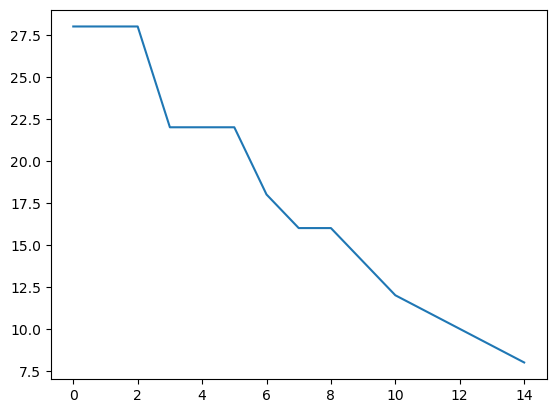

In [58]:
sns.lineplot(n_list)

### Sample Size Calculator

$$
Sample Size = \cfrac{\cfrac{z^{2}p(1-p)}{e^{2}}}{1 + (\cfrac{z^{2}p(1-p)}{e^{2}N})}
$$

dimana:

$p = proporsi$

$e$ = margins of error

$z = s-statistik$

$N = Jumlah Populasi$

In [59]:
# This script calculates the sample size needed for a proportion survey given a set of confidence intervals and margins of errors.
# Proportion, because the value is unknown then assume the value is 0.5
p = 0.5

# Total population, total number of districts passed by the local train line
N = 28

# Confidence Interval
CI = [0.01, 0.05, 0.1, 0.15, 0.2]

# Margins of Errors
MoE = [0.05, 0.1, 0.15, 0.2, 0.25]

n_list = []
index_CI = []
index_error = []

# he script uses the normal distribution and the Z-score to calculate the sample size (n) 
# for each combination of confidence interval and margin of error.
for i in range(len(CI)):
    for x in range(len(MoE)):
        # z-statistic value
        z_stat = stats.norm.ppf(1 - CI[i]/2.)

        # Enumerator
        enum = (z_stat**2 * p * (1 - p)) / MoE[x]**2
        
        # Denomerator
        denom = 1 + ((z_stat**2 * p * (1 - p))/(MoE[x]**2 * N))

        # Sanple Size
        n = enum / denom

        # The calculated sample sizes, confidence intervals, and margins of errors 
        # are stored in the n_list, index_CI, and index_error lists respectively.
        n_list.append(math.ceil(n))
        index_CI.append(CI[i])
        index_error.append(MoE[x])

In [60]:
# This script creates a sample size dataframe by using the Confidence Interval (CI) and Margins of Error (MoE) as inputs.
# The sample size, Confidence Interval, and Margins of Error will be stored into the dataframe df_sample_size. 
df_sample_size = pd.DataFrame({
    'Confidence Interval' : index_CI,
    'Margins of Error' : index_error,
    'Jumlah Sampel' : n_list
})

# The dataframe is then returned as the final output.
df_sample_size

,Confidence Interval,Margins of Error,Jumlah Sampel
0,0.01,0.05,27
1,0.01,0.10,24
2,0.01,0.15,21
3,0.01,0.20,17
4,0.01,0.25,14
5,0.05,0.05,27
6,0.05,0.10,22
7,0.05,0.15,17
8,0.05,0.20,13
9,0.05,0.25,10


In [61]:
# This script is taking a random sample of 8 elements from the dataframe "df_pop_target" without replacement.
tahap_1_sample = df_pop_target.sample(8, replace=False) # ensures that each element in the population is chosen only once

In [62]:
# Then reset the index and remove the original index column.
tahap_1_sample.reset_index(inplace=True)
tahap_1_sample.drop(['index'], axis=1, inplace=True)

# The sample is stored in a new dataframe "tahap_1_sample" and show it.
tahap_1_sample

,kode_kemendagri,kecamatan,jumlah_desa_kelurahan,ibukota_kecamatan,luas_area,populasi,laju_pertumbuhan,persentase_penduduk,kepadatan_penduduk
0,32.77.02,Cimahi Tengah,6,Cimahi,10.11,161900,0.08,0.2831,16009.0
1,32.17.06,Ngamprah,11,Ngamprah,36.01,179782,1.38,9.9100,4992.6
2,32.17.04,Cikalong Wetan,13,Cikalong Wetan,112.93,129919,1.62,7.1600,1150.4
3,32.73.16,Kiaracondong,6,Babakan Sari,6.12,126600,0.01,5.1600,21834.0
4,32.73.04,Bojongloa Kaler,5,Suka Asih,3.03,119400,0.09,4.8700,38267.0
5,32.77.01,Cimahi Selatan,5,Utama,16.94,242200,0.65,0.4237,14295.0
6,32.04.28,Rancaekek,14,Rancaekek Wetan,45.25,187396,1.02,5.1100,4141.0
7,32.73.28,Panyileukan,4,Mekar Mulya,5.10,40100,0.61,1.6400,7554.0


## Tahap 2

In [63]:
# Next it creates a list "tahap_1_kec" which contains the names of the selected kecamatan.
tahap_1_kec = tahap_1_sample['kecamatan'].to_list()

# Then it filters the dataframe "df_kelurahan_filtered" to include only the rows 
# where the kecamatan name is in the list "tahap_1_kec"
tahap_1_sample_kel = df_kelurahan_filtered.copy()
tahap_1_sample_kel = tahap_1_sample_kel[tahap_1_sample_kel['nama_kecamatan'].isin(tahap_1_kec)]

# and also drops the 'nama_kabupaten_kota' column.
tahap_1_sample_kel.drop(columns=['nama_kabupaten_kota'], axis=1, inplace=True)

# Finally show dataframe
tahap_1_sample_kel

,nama_kecamatan,nama_desa_kelurahan,jumlah_penduduk
127,Rancaekek,Rancaekek Wetan,22974
128,Rancaekek,Rancaekek Kulon,13709
129,Rancaekek,Bojongsalam,7536
130,Rancaekek,Bojongloa,20743
131,Rancaekek,Jelegong,27934
132,Rancaekek,Linggar,10580
133,Rancaekek,Cangkuang,13207
134,Rancaekek,Haurpugur,8286
135,Rancaekek,Sukamanah,7997
136,Rancaekek,Sukamulya,8387


In [64]:
# This script is calculating the sample size for a survey in which the sample will be selected from a list of villages.
# Proportion, because the value is unknown then assume the value is 0.5
p = 0.5

# Confidence Interval and Margins of Errors
interval = [0.15, 0.2, 0.25, 0.3]

n_list = []

# The script iterates through each village in the list, 
# using the total population of that village to calculate the sample size for each Confidence Interval provided.
for sampel in range(len(tahap_1_sample)):
    # Total population based on the number of villages
    N = tahap_1_sample['jumlah_desa_kelurahan'].iloc[sampel]
    
    for i in range(len(interval)):
        # Z-statistik
        z_stat = stats.norm.ppf(1 - interval[i]/2.)

        # Enumerator
        enum = (z_stat**2 * p * (1 - p)) / interval[i]**2
        
        # Denomerator
        denom = 1 + ((z_stat**2 * p * (1 - p))/(interval[i]**2 * N))

        # Sample Size
        n = enum / denom
        
        # appends the Confidence Interval, distrik name, total population, and calculated sample size to a list.
        n_list.append([
            interval[i], # Confidence Interval
            tahap_1_sample['kecamatan'].iloc[sampel], # Kecamatan
            N, # Total of Villages
            math.ceil(n) # Sample Size
        ])

In [65]:
# Then stored in a Pandas DataFrame named "kel_sample_size".
kel_sample_size = pd.DataFrame(
    n_list,
    columns=[
        'confidence_interval',
        'kecamatan',
        'jumlah_kelurahan',
        'jumlah_sampel'
    ]
)

In [66]:
#  The script filters the dataframe to only show the sample size for the districts that have a confidence interval of 0.20.
kel_sample_size[kel_sample_size['confidence_interval'] == 0.20]

,confidence_interval,kecamatan,jumlah_kelurahan,jumlah_sampel
1,0.2,Cimahi Tengah,6,4
5,0.2,Ngamprah,11,6
9,0.2,Cikalong Wetan,13,6
13,0.2,Kiaracondong,6,4
17,0.2,Bojongloa Kaler,5,4
21,0.2,Cimahi Selatan,5,4
25,0.2,Rancaekek,14,6
29,0.2,Panyileukan,4,3


In [67]:
#  The script filters the dataframe to only show the sample size for the districts that have a confidence interval of 0.25.
kel_sample_size[kel_sample_size['confidence_interval'] == 0.25]

,confidence_interval,kecamatan,jumlah_kelurahan,jumlah_sampel
2,0.25,Cimahi Tengah,6,3
6,0.25,Ngamprah,11,4
10,0.25,Cikalong Wetan,13,4
14,0.25,Kiaracondong,6,3
18,0.25,Bojongloa Kaler,5,3
22,0.25,Cimahi Selatan,5,3
26,0.25,Rancaekek,14,4
30,0.25,Panyileukan,4,3


In [68]:
# Empty dictionary to store sample size values
n_sample_kel = {}

# Then, it's iterating through each row of kel_sample_size DataFrame, 
# which contains the sample size calculation for each kecamatan.
for i, row in kel_sample_size[kel_sample_size['confidence_interval'] == 0.25].iterrows():
    n_sample_kel[row[1]] = row[3]

In [69]:
# Group the data in tahap_1_sample_kel based on the nama_kecamatan column.
tahap_2 = tahap_1_sample_kel.groupby('nama_kecamatan')

# Randomly sample a number of rows from each group of the grouped data, 
# where the number of samples is determined by the value in the n_sample_kel dictionary with the key being the nama_kecamatan.
tahap_2_sample = tahap_2.apply(lambda x: x.sample(n_sample_kel[x.name]))

# Finally, show dataframe
tahap_2_sample

nama_kecamatan nama_desa_kelurahan  jumlah_penduduk
nama_kecamatan                                                           
Bojongloa Kaler 754  Bojongloa Kaler        Babakan Asih            16384
                758  Bojongloa Kaler           Suka Asih            19531
                757  Bojongloa Kaler                Kopo            31109
Cimahi Selatan  859   Cimahi Selatan              Melong            64328
                857   Cimahi Selatan           Cibeureum            60889
                860   Cimahi Selatan               Utama            34138
Cimahi Tengah   865    Cimahi Tengah            Padasuka            40232
                866    Cimahi Tengah          Setiamanah            23404
                862    Cimahi Tengah      Cigugur Tengah            47067
Kiaracondong    808     Kiaracondong            Cicaheum            17454
                811     Kiaracondong            Sukapura            27843
                809     Kiaracondong      Kebon Kangkung            12671
Ngamprah        604         Ngamprah        Gadobangkong            15622
                602         Ngamprah           Margajaya            15261
                601         Ngamprah        Bojongkoneng            13093
                597         Ngamprah            Cimareme            10302
Panyileukan     823      Panyileukan      Cipadung Kidul            15441
                826      Panyileukan         Mekar Mulya             7375
                824      Panyileukan      Cipadung Kulon            13709
Rancaekek       130        Rancaekek           Bojongloa            20743
                137        Rancaekek      Tegal Sumedang             5519
                134        Rancaekek           Haurpugur             8286
                136        Rancaekek           Sukamulya             8387